In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from numpy import random

In [2]:
y=np.loadtxt("test.out1",dtype='float',delimiter=None)

In [3]:
x=np.loadtxt("test.out",dtype='float',delimiter=None)

[2.60649704 1.99271796]
[1.13471332 1.98816703]
[-5.28302570e+28  1.70854685e+31]
[1.70881531 1.98994223]
[2.60672625 1.99271867]


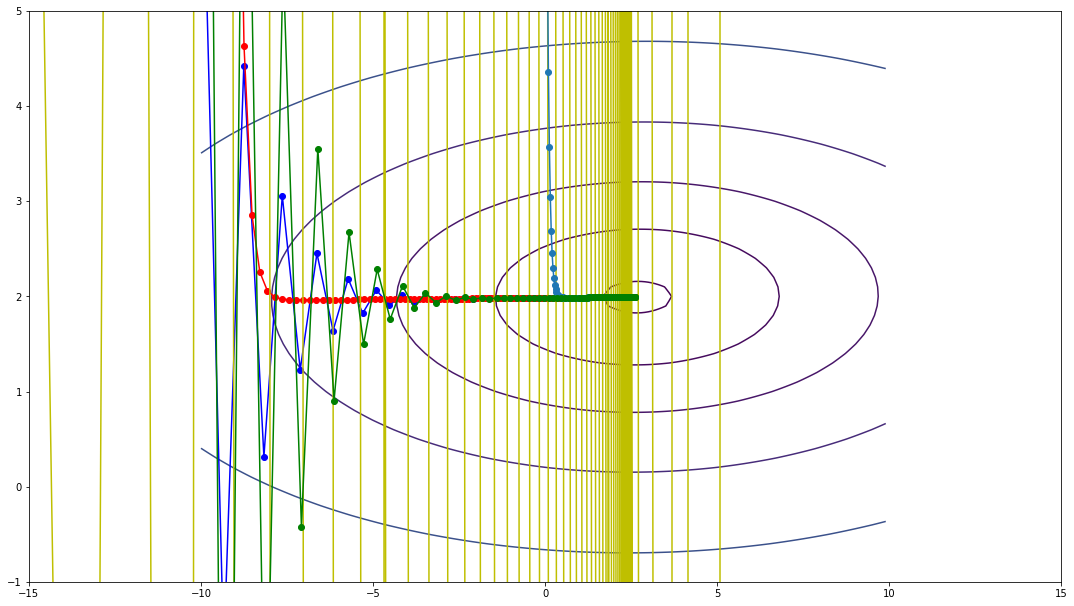

In [7]:
a=np.arange(-10,10,0.1)
b=np.arange(-10,10,0.1)

E=[]
#avgE_allcomb=[]

for i in a:
    for j in b:
        k=np.mean((y-(i*x+j))**2)
        E.append(k)


E=np.array(E)
E2d=E.reshape(200,200)

X,Y=np.meshgrid(a,b)
fig, ax = plt.subplots(1, 1)
ax.contour(X, Y, E2d,levels=[1,2,4,8,16,32,64,128,256,512,1024])
ax.set_xlim(-15,15)
ax.set_ylim(-1,5)
fig.set_size_inches(18.5,10.5)
def ssr_gradient(x, y, b):
        res = b[0] + b[1] * x - y
        return res.mean(), (res * x).mean()  # .mean() is a method of np.ndarray
def gradient_descent(gradient, x, y, startpoint, learn_rate=0.05, no_iter=100, tolerance=1e-09):
        vector = startpoint
        trajectory = [[vector[0],vector[1]]]
        for _ in range(no_iter):
            diff = -learn_rate * np.array(gradient(x, y, vector))
            if np.all(np.abs(diff) <= tolerance):
                break
            vector += diff
            trajectory.append([vector[0],vector[1]])
            #print(vector)
            #plt.plot(vector[0],vector[1],'o')
        return vector,np.array(trajectory)

v1,trajectory1=gradient_descent(ssr_gradient,x,y,learn_rate=0.05,startpoint=[-10,7.5]) #The point b,a converges
print(v1)
plt.plot(trajectory1[:,0],trajectory1[:,1],'bo-')


v2,trajectory2=gradient_descent(ssr_gradient,x,y,learn_rate=0.02,startpoint=[-9,10]) #The point b,a converges
print(v2)
plt.plot(trajectory2[:,0],trajectory2[:,1],'ro-')

v3,trajectory3=gradient_descent(ssr_gradient,x,y,learn_rate=0.09,startpoint=[-15,15]) #The point b,a diverges
print(v3)
plt.plot(trajectory3[:,0],trajectory3[:,1],'yo-')

v4,trajectory4=gradient_descent(ssr_gradient,x,y,learn_rate=0.01,startpoint=[0,10]) #The point b,a converges
print(v4)
plt.plot(trajectory4[:,0],trajectory4[:,1],'o-')


v5,trajectory5=gradient_descent(ssr_gradient,x,y,learn_rate=0.05,startpoint=[-10,20]) #The point b,a converges
print(v5)
plt.plot(trajectory5[:,0],trajectory5[:,1],'go-')


plt.show()